# Theme
1. Is college worth it?
2. More specifically, is CMU worth it for you?

# Questions to ask
## Basic questions
- Tableau a map of institutions
- Accessibility to low-income students vs. graduation rates and earnings outcomes

## Time series
- Change in tuition costs
- Change in popular programs


---
# Tableau results

Let's consider some comparisons of graduation rates based on the scorecard data...

In [0]:
from IPython.display import Image

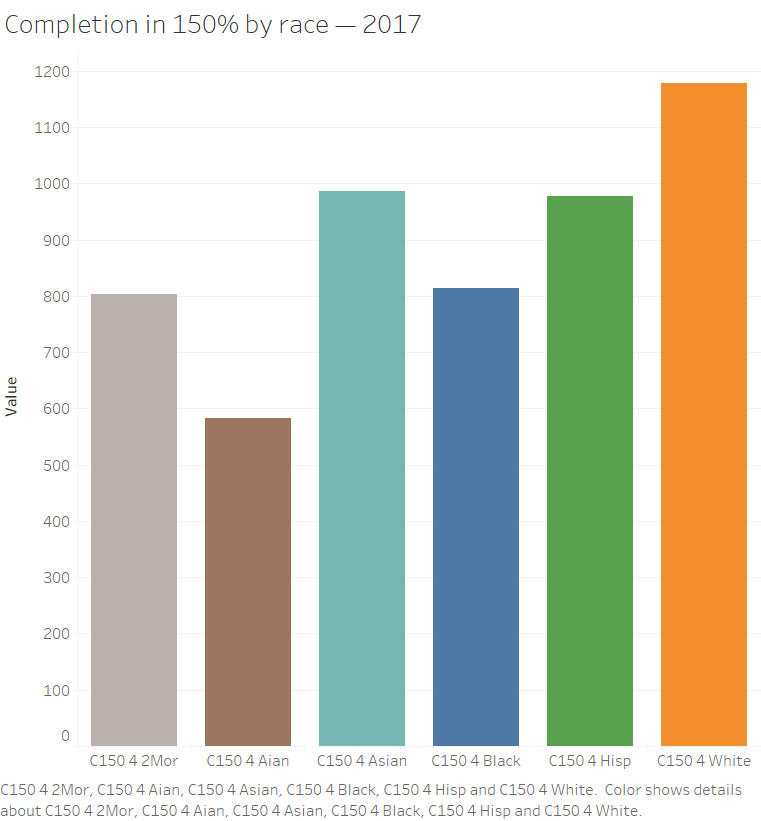

In [0]:
Image('img/completion_race.png')

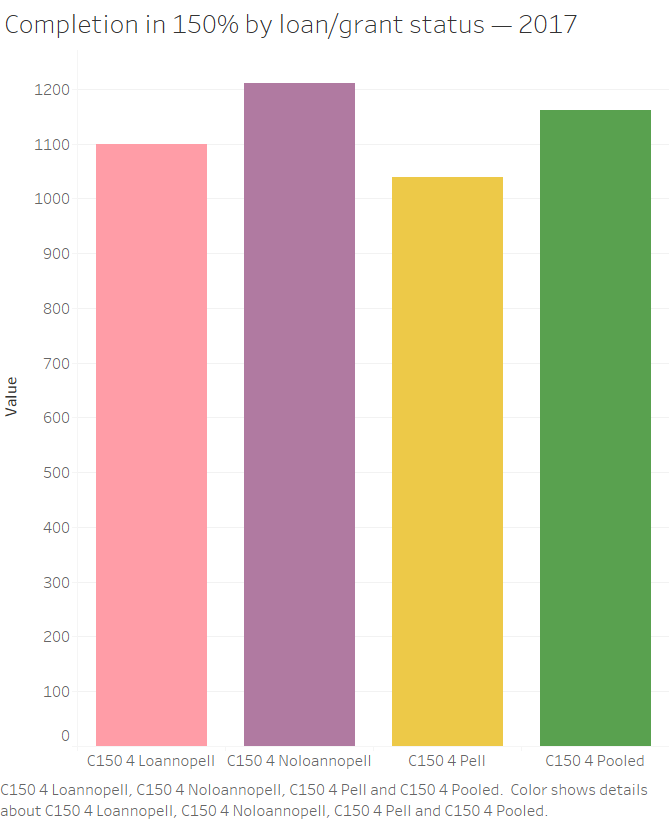

In [0]:
Image('img/completion_loans.png')

# EDA #
Let's find out how low-income access and earnings outcomes look together.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/Most-Recent-Cohorts-All-Data-Elements.csv', na_values='PrivacySuppressed')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,OMENRYP_ALL,OMENRAP_ALL,OMAWDP8_ALL,OMENRUP_ALL,OMENRYP_FIRSTTIME,OMENRAP_FIRSTTIME,OMAWDP8_FIRSTTIME,OMENRUP_FIRSTTIME,OMENRYP_NOTFIRSTTIME,OMENRAP_NOTFIRSTTIME,OMAWDP8_NOTFIRSTTIME,OMENRUP_NOTFIRSTTIME,OMENRYP_FULLTIME,OMENRAP_FULLTIME,OMAWDP8_FULLTIME,OMENRUP_FULLTIME,OMENRYP_PARTTIME,OMENRAP_PARTTIME,OMAWDP8_PARTTIME,OMENRUP_PARTTIME,OMENRYP_ALL_POOLED_SUPP,OMENRAP_ALL_POOLED_SUPP,OMAWDP8_ALL_POOLED_SUPP,OMENRUP_ALL_POOLED_SUPP,OMENRYP_FIRSTTIME_POOLED_SUPP,OMENRAP_FIRSTTIME_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMENRUP_FIRSTTIME_POOLED_SUPP,OMENRYP_NOTFIRSTTIME_POOLED_SUPP,OMENRAP_NOTFIRSTTIME_POOLED_SUPP,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.9027,0.902671,365.0,485.0,...,0.0260,0.4052,0.3537,0.2150,0.0311,0.4235,0.3336,0.2118,0.0142,0.3623,0.4008,0.2227,0.0251,0.3966,0.3707,0.2076,0.0309,0.4517,0.2625,0.2548,0.0152,0.3255,0.3645,0.2947,0.0163,0.3273,0.3532,0.3032,0.0113,0.3194,0.4048,0.2645,0.0137,0.3150,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,3.0,0,1,1,3,4,1,1,5,12.0,NaN,33.505697,-86.799345,15.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.9181,0.918068,440.0,630.0,...,0.1281,0.2664,0.5441,0.0615,0.1270,0.2724,0.5594,0.0413,0.1292,0.2603,0.5284,0.0822,0.1162,0.2663,0.5721,0.0454,0.1886,0.2672,0.4008,0.1434,0.0828,0.2588,0.5591,0.0993,0.0786,0.2684,0.5716,0.0814,0.0876,0.2477,0.5448,0.1200,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,3.0,0,1,1,3,4,2,1,5,12.0,NaN,32.362609,-86.174010,20.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,0.0165,0.2686,0.4174,0.2975,0.0000,0.2778,0.3333,0.3889,0.0179,0.2679,0.4241,0.2902,0.0112,0.2793,0.4022,0.3073,0.0317,0.2381,0.4603,0.2698,0.0185,0.3386,0.4418,0.2011,0.0263,0.4474,0.2368,0.2895,0.0176,0.3265,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.0280,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.724557,-86.640449,16.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.8123,0.812304,550.0,660.0,...,0.0166,0.3153,0.5140,0.1541,0.0243,0.3360,0.5110,0.1286,0.0100,0.2973,0.5165,0.1762,0.0163,0.3042,0.5472,0.1322,0.0183,0.3670,0.3578,0.2569,0.0177,0.3337,0.5079,0.1406,0.0223,0.3514,0.5039,0.1224,0.0130,0.3156,0.5121,0.1593,0.0165,0.3230,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,3.0,0,1,1,3,4,1,1,5,12.0,NaN,32.364317,-86.295677,19.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.9787,0.978661,380.0,485.0,...,0.0355,0.5073,0.3177,0.1395,0.0342,0.5023,0.2924,0.1711,0.0412,0.5292,0.4296,0.0000,0.0362,0.5049,0.3226,0.1363,0.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1944), int64(14), object(19)
memory usage: 107.3+ MB


## Tuition vs Earnings



In [29]:
# let's get tuition, mean/median earnings after 10 years, admittance rates, percentage of Pell grants,retention rate at 4-year colleges
sub_data = data[['UNITID',
                 'TUITIONFEE_IN', 
                 'TUITIONFEE_OUT', 
                 'MN_EARN_WNE_P6', 
                 'MD_EARN_WNE_P6', 
                 'MN_EARN_WNE_P10', 
                 'MD_EARN_WNE_P10',
                 'ADM_RATE',
                 'PCTPELL',
                 'DEBT_MDN',
                 'GRAD_DEBT_MDN',
                'RET_FT4','C150_4']].copy()
sub_data.head()

,UNITID,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P6,MD_EARN_WNE_P6,MN_EARN_WNE_P10,MD_EARN_WNE_P10,ADM_RATE,PCTPELL,DEBT_MDN,GRAD_DEBT_MDN,RET_FT4,C150_4
0,100654,9857.0,18236.0,28400.0,25200.0,35500.0,31000.0,0.9027,0.7100,13246.0,32750.0,0.5879,0.2396
1,100663,8328.0,19032.0,39400.0,35100.0,48400.0,41200.0,0.9181,0.3532,14979.5,21833.0,0.8436,0.5292
2,100690,6900.0,6900.0,35400.0,30700.0,47600.0,39600.0,NaN,0.7415,10430.0,22890.0,0.6667,0.1818
3,100706,10280.0,21480.0,40300.0,36200.0,52000.0,46700.0,0.8123,0.2765,13522.0,22647.0,0.8248,0.4862
4,100724,11068.0,19396.0,24400.0,22600.0,30600.0,27700.0,0.9787,0.7377,15738.0,31500.0,0.5923,0.2769


In [30]:
sub_data['MN_EARN_WNE_P6'] = pd.to_numeric(sub_data['MN_EARN_WNE_P6'])
sub_data['MD_EARN_WNE_P6'] = pd.to_numeric(sub_data['MD_EARN_WNE_P6'])
sub_data['MN_EARN_WNE_P10'] = pd.to_numeric(sub_data['MN_EARN_WNE_P10'])
sub_data['MD_EARN_WNE_P10'] = pd.to_numeric(sub_data['MD_EARN_WNE_P10'])
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 13 columns):
UNITID             7112 non-null int64
TUITIONFEE_IN      4021 non-null float64
TUITIONFEE_OUT     3793 non-null float64
MN_EARN_WNE_P6     5358 non-null float64
MD_EARN_WNE_P6     5358 non-null float64
MN_EARN_WNE_P10    5175 non-null float64
MD_EARN_WNE_P10    5175 non-null float64
ADM_RATE           2037 non-null float64
PCTPELL            6342 non-null float64
DEBT_MDN           5969 non-null float64
GRAD_DEBT_MDN      5570 non-null float64
RET_FT4            2174 non-null float64
C150_4             2383 non-null float64
dtypes: float64(12), int64(1)
memory usage: 722.4 KB


<Figure size 432x288 with 0 Axes>

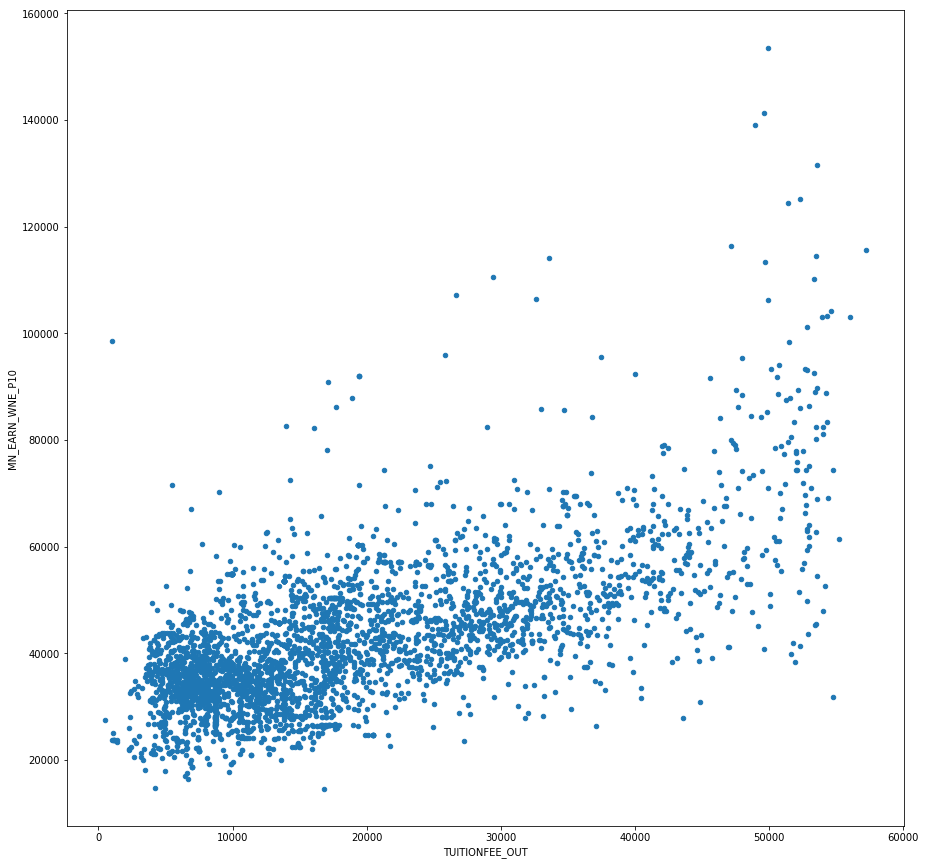

In [11]:
# let's start with out-state tuition for now
plt.figure()
sub_data.plot.scatter(x='TUITIONFEE_OUT', y='MN_EARN_WNE_P10', figsize=(15,15))

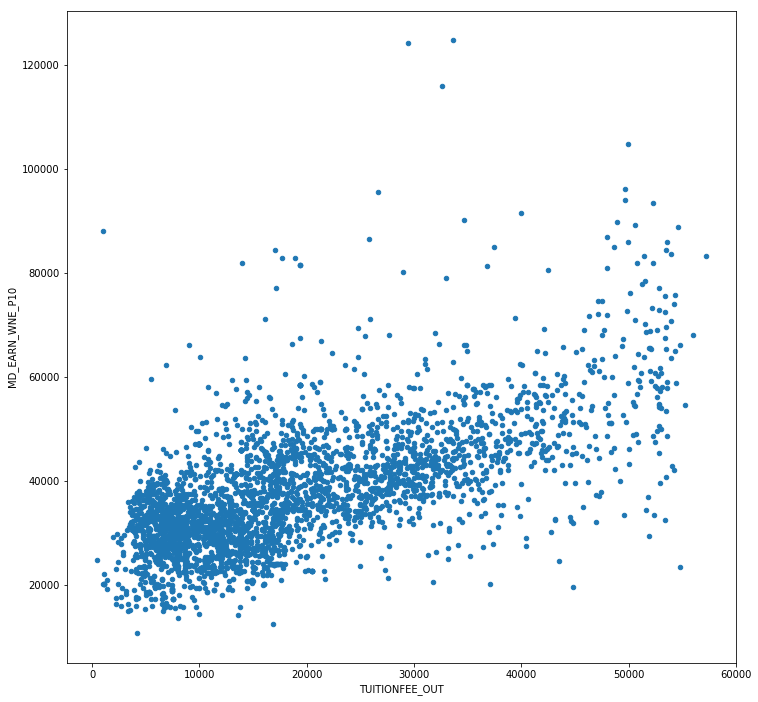

In [12]:
# interesting... now the median?
sub_data.plot.scatter(x='TUITIONFEE_OUT', y='MD_EARN_WNE_P10', figsize=(12,12))

In [0]:
cmu_mask = (sub_data['UNITID']==211440)

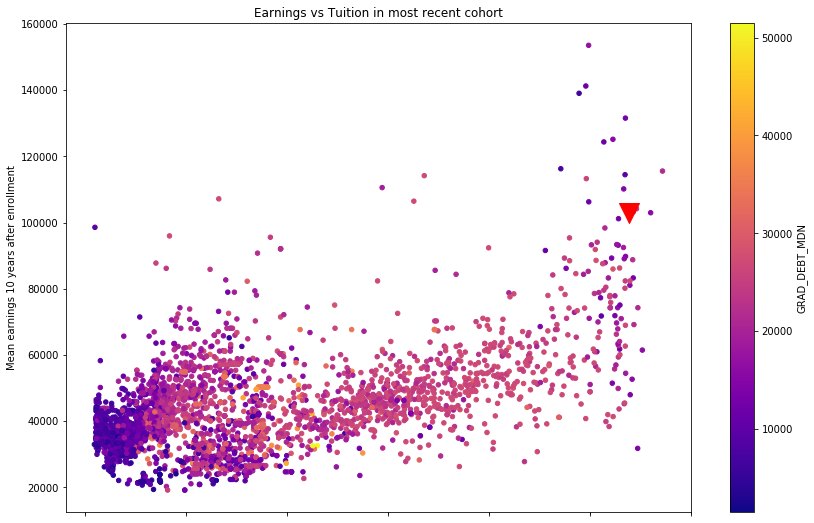

In [41]:
# let's mix in the admission rate of these schools
ax = sub_data.plot.scatter(x='TUITIONFEE_IN', y='MN_EARN_WNE_P10', c='GRAD_DEBT_MDN', cmap='plasma', figsize=(14,9),)
ax.scatter(sub_data[cmu_mask].TUITIONFEE_IN, sub_data[cmu_mask].MN_EARN_WNE_P10, s=400, c='r', marker='v')
ax.set_title('Earnings vs Tuition in most recent cohort')
ax.set_ylabel('Mean earnings 10 years after enrollment')
ax.set_xlabel('Tuition cost');

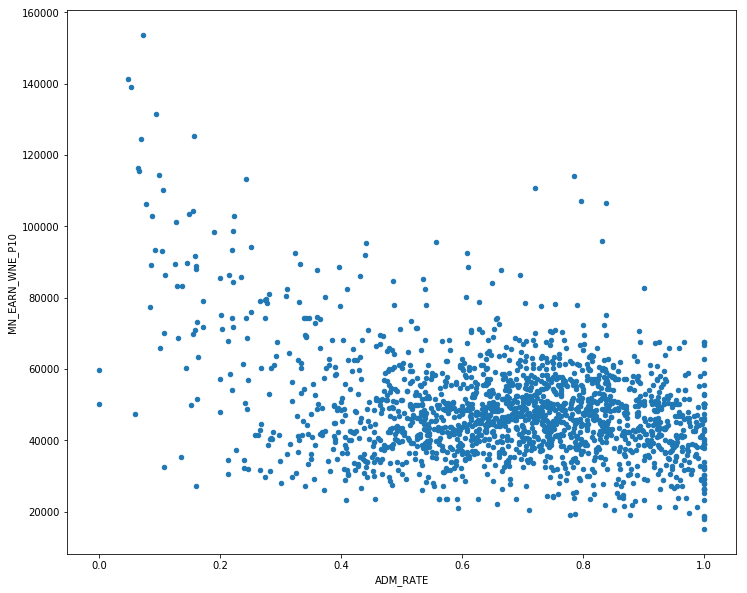

In [0]:
# interesting... let's look more at admission rates vs. earnings
sub_data.plot.scatter(x='ADM_RATE', y='MN_EARN_WNE_P10', figsize=(12,10))

<Figure size 432x288 with 0 Axes>

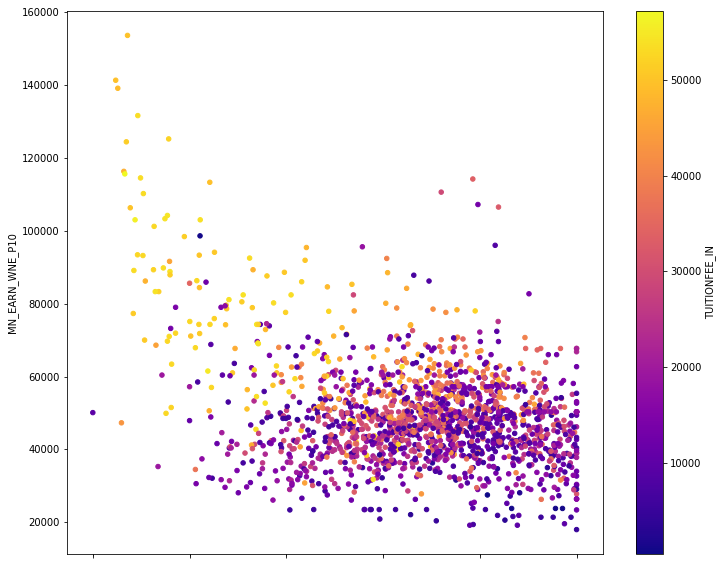

In [0]:
# and now mix in tuition rate again
plt.figure()
sub_data.plot.scatter(x='ADM_RATE', y='MN_EARN_WNE_P10', c='TUITIONFEE_IN', cmap='plasma', figsize=(12,10))

<Figure size 432x288 with 0 Axes>

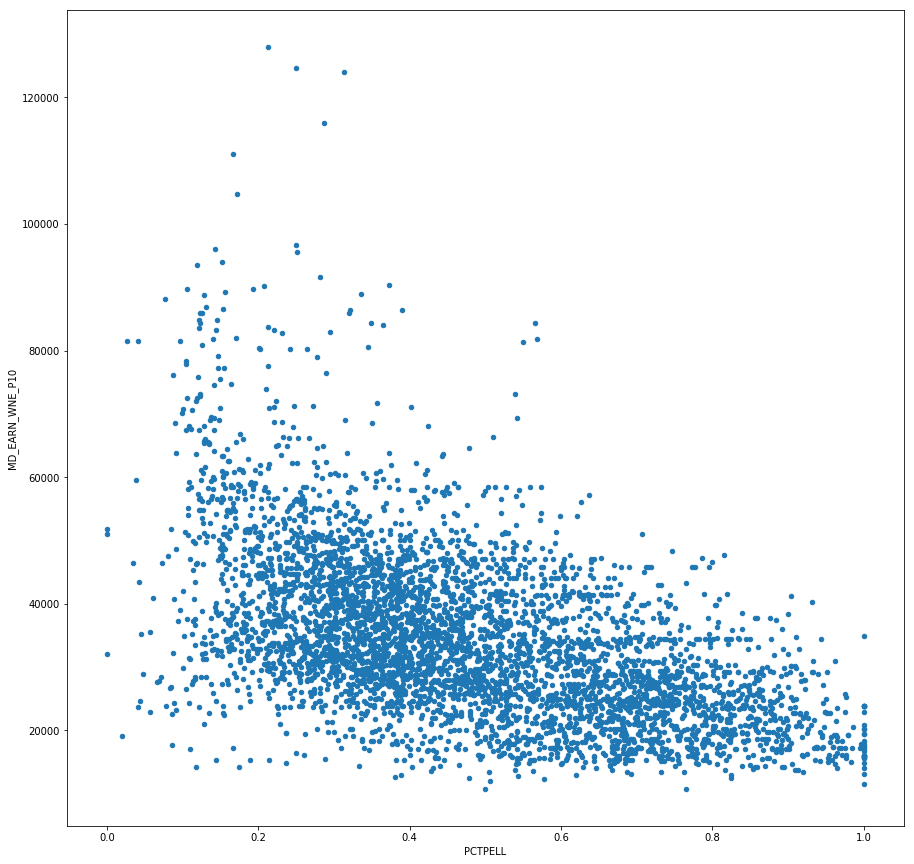

In [0]:
# Is there a pattern between Percentage of Pell grant students and mean earnings?
plt.figure()
sub_data.plot.scatter(x='PCTPELL', y='MD_EARN_WNE_P10', figsize=(15,15))

<Figure size 432x288 with 0 Axes>

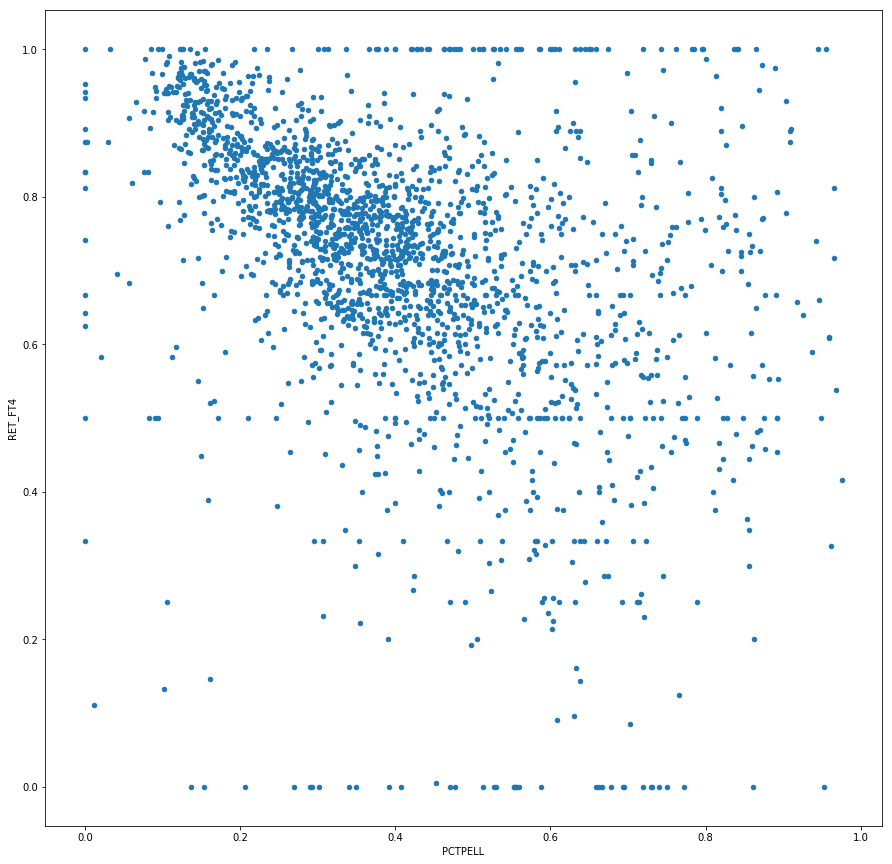

In [0]:
plt.figure()
sub_data.plot.scatter(x='PCTPELL', y='RET_FT4', figsize=(15,15))

<Figure size 432x288 with 0 Axes>

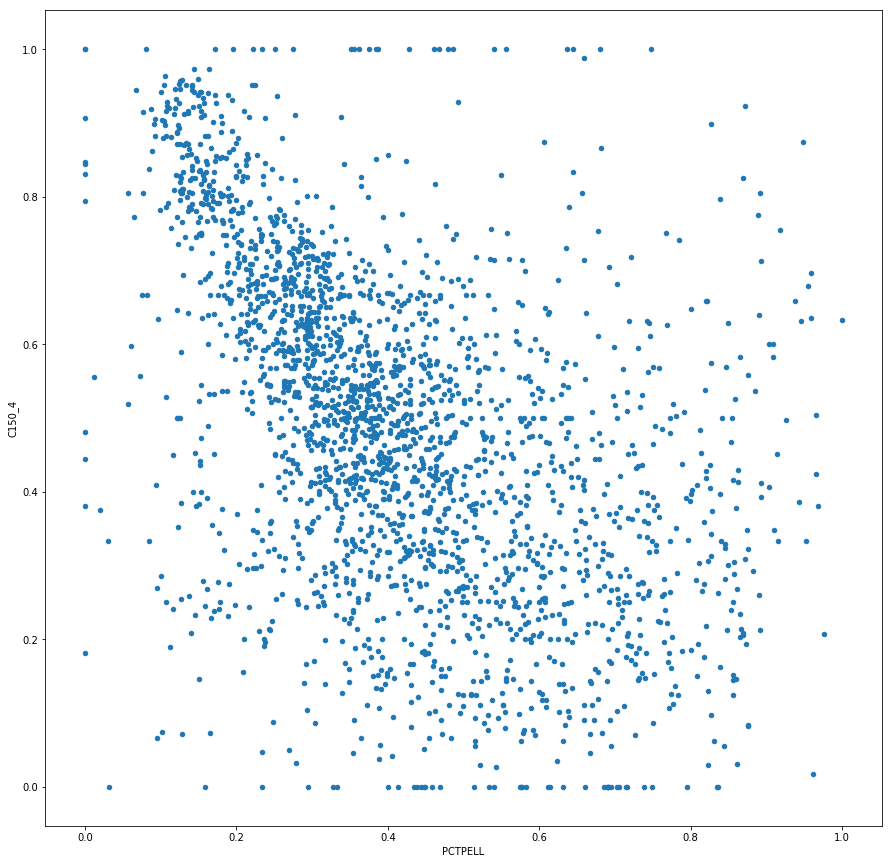

In [0]:
plt.figure()
sub_data.plot.scatter(x='PCTPELL', y='C150_4', figsize=(15,15))

# Data loading #
We want all data (just the columns we care about) loaded together so that we can look at change over time... Let's do it.



In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn')

In [0]:
cols_of_interest = ['UNITID',
                    'INSTNM',
                    'ADM_RATE',
                    'TUITIONFEE_IN',    # instate tuition
                    'TUITIONFEE_OUT',   # out of state tuition
                    'C150_4',    # completion rate within 150% of expected time
                    'MN_EARN_WNE_P6', 
                    'MD_EARN_WNE_P6', 
                    'PCT10_EARN_WNE_P6',
                    'PCT25_EARN_WNE_P6',
                    'PCT75_EARN_WNE_P6',
                    'PCT90_EARN_WNE_P6',
                    'PCTPELL',      # percent of students receiving pell grant (2008 on)
                    'RET_FT4',    # percent of students enrolled 1 yr after starting
                    'UGDS',    # not available in 2000-2001 file
                    'TUITFTE',    # net tuition revenue per student
                    'INEXPFTE',   # instructional expenditure per student
                    'AVGFACSAL',  # avg faculty salary per month
                    'PCTFLOAN',   # pct of students receiving federal loans
                    'CDR2',       # 2-yr default rate (2012 and prior)
                    'CDR3',       # 3-yr default rate (2012 on)
                    'DEBT_MDN',   # median loan debt accumulated
                    'PELL_DEBT_MDN',
                    'NOPELL_DEBT_MDN',
                    'PELL_EVER',  # students who received pell grant ever
                    'LOAN_EVER',  # students who received loan ever
                    'FAMINC',     # avg family income in 2015 dollars (earnings cohort)
                    'MD_FAMINC',  # median family income (earnings cohort)
                    'DEBT_MDN_SUPP',  # median debt suppressed for n < 30
                    'GRAD_DEBT_MDN_SUPP', # same, but for completers
                    'CONTROL', # 1: Public, 2: Private nonprof, 3: Priv for-prof
                    ]

# now set up the data types of these columns -- all but the name will be floats
col_types = {a: np.dtype('float64') for a in cols_of_interest[2:]}

In [0]:
# now test on one file
data = pd.read_csv('data/MERGED2008_09_PP.csv', na_values='PrivacySuppressed', 
                   usecols=cols_of_interest, dtype=col_types)
data.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP
0,100654,Alabama A & M University,1,0.4900,4290.0,4072.0,7304.0,5447.0,5544.0,6421.0,0.3408,0.3250,0.6780,NaN,0.110,NaN,7860.5,8585.0,6753.5,0.927180,0.819644,34968.108383,25066.0,NaN,NaN,7860.5,19126.0
1,100663,University of Alabama at Birmingham,1,0.8510,9989.0,4664.0,10352.0,5229.0,16379.0,8666.0,0.2847,0.3984,0.7954,NaN,0.034,NaN,7500.0,8250.0,6250.0,0.918703,0.588581,48381.730028,35025.0,NaN,NaN,7500.0,13000.0
2,100690,Amridge University,2,NaN,356.0,6600.0,6600.0,10284.0,5019.0,3326.0,0.6851,0.2000,0.6667,NaN,0.092,NaN,7500.0,7500.0,8334.0,0.944615,0.720000,31490.172308,24658.0,NaN,NaN,7500.0,14090.0
3,100706,University of Alabama in Huntsville,1,0.8917,5689.0,5952.0,13092.0,5494.0,7500.0,7812.0,0.2422,0.4754,0.7747,NaN,0.039,NaN,7500.0,8875.0,6500.0,0.919624,0.640445,49859.403164,35982.0,NaN,NaN,7500.0,14500.0
4,100724,Alabama State University,1,0.4228,4730.0,5460.0,10068.0,5461.0,5899.0,6367.0,0.6221,0.2120,0.5448,NaN,0.169,NaN,6731.5,7186.0,5500.0,0.944316,0.873840,27650.760441,20631.5,NaN,NaN,6731.5,21942.0


In [0]:
# get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 27 columns):
UNITID                2402 non-null int64
INSTNM                2402 non-null object
CONTROL               2402 non-null int64
ADM_RATE              1012 non-null float64
UGDS                  2282 non-null float64
TUITIONFEE_IN         1675 non-null float64
TUITIONFEE_OUT        1675 non-null float64
TUITFTE               2392 non-null float64
INEXPFTE              2392 non-null float64
AVGFACSAL             1822 non-null float64
PCTPELL               2274 non-null float64
C150_4                997 non-null float64
RET_FT4               986 non-null float64
PCTFLOAN              0 non-null float64
CDR2                  2355 non-null float64
CDR3                  0 non-null float64
DEBT_MDN              2013 non-null float64
PELL_DEBT_MDN         1836 non-null float64
NOPELL_DEBT_MDN       1836 non-null float64
LOAN_EVER             1835 non-null float64
PELL_EVER             1944

In [0]:
# also want the year in here as a column... 
# we'll use the second of the two for any school year
data['Year'] = pd.Period('2009', freq='Y')
data.head(1)

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100654,Alabama A & M University,1,0.49,4290.0,4072.0,7304.0,5447.0,5544.0,6421.0,0.3408,0.325,0.678,NaN,0.11,NaN,7860.5,8585.0,6753.5,0.92718,0.819644,34968.108383,25066.0,NaN,NaN,7860.5,19126.0,2009


Now let's wrap it all up into a reusable function!

In [0]:
def read_college_files(year, cols, col_types):
  '''
  This function reads a single csv file from the College Scorecard dataset,
  adds a 'Year' column, and returns the data as a Dataframe.

  Assumes the files are in a directory called 'data'.
  '''
  second_year_abbrev = str(year+1)[2:]
  fname = f"data/MERGED{year}_{second_year_abbrev}_PP.csv"
  frame = pd.read_csv(fname, na_values=['PrivacySuppressed','PrivacySuppr'], 
                   usecols=cols, dtype=col_types)
  frame['Year'] = pd.Period(str(year+1), freq='Y')

  return frame

In [0]:
# let's test it on all the files, concatenating so we can have tidy time-series data
data = pd.concat(read_college_files(year, cols_of_interest, col_types) for year in range(1996,2018))
data.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100636,Community College of the Air Force,1,NaN,44141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
1,100654,Alabama A & M University,1,NaN,3852.0,NaN,NaN,NaN,NaN,4285.0,NaN,NaN,NaN,NaN,0.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
2,100663,University of Alabama at Birmingham,1,NaN,9889.0,NaN,NaN,NaN,NaN,5988.0,NaN,NaN,NaN,NaN,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1,NaN,295.0,NaN,NaN,NaN,NaN,4406.0,NaN,NaN,NaN,NaN,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
4,100690,Amridge University,2,NaN,60.0,NaN,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997


In [0]:
!ls data

In [0]:
data[data['INSTNM'].str.contains('Carnegie Mellon')].head(20)

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
4085,211440,Carnegie Mellon University,2,NaN,4814.0,NaN,NaN,NaN,NaN,8452.0,NaN,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
3904,211440,Carnegie Mellon University,2,NaN,4831.0,NaN,NaN,NaN,NaN,8790.0,NaN,0.7179,NaN,NaN,0.030,NaN,15505.0,16250.0,15029.0,0.987821,0.307051,61004.964744,55590.0,NaN,NaN,15505.0,NaN,1998
3785,211440,Carnegie Mellon University,2,NaN,5039.0,NaN,NaN,14268.0,18703.0,9063.0,NaN,0.7520,NaN,NaN,0.027,NaN,15125.0,15125.0,15125.0,0.987763,0.310673,64180.526173,59628.0,NaN,NaN,15125.0,NaN,1999
3745,211440,Carnegie Mellon University,2,NaN,5138.0,NaN,NaN,14249.0,18257.0,9366.0,NaN,0.7771,NaN,NaN,0.019,NaN,15062.0,15125.0,14768.0,0.985743,0.314325,68129.050916,61562.0,NaN,NaN,15062.0,NaN,2000
3677,211440,Carnegie Mellon University,2,NaN,NaN,24792.0,24792.0,15385.0,19744.0,NaN,NaN,0.7652,NaN,NaN,0.019,NaN,14803.0,15535.0,14500.0,0.980147,0.325000,72036.447059,62038.5,NaN,NaN,14803.0,NaN,2001
3673,211440,Carnegie Mellon University,2,0.3121,5194.0,25872.0,25872.0,16142.0,21824.0,10267.0,NaN,0.7867,NaN,NaN,0.022,NaN,15125.0,16125.0,14500.0,0.979547,0.306063,75991.422206,65248.0,NaN,NaN,15125.0,NaN,2002
3517,211440,Carnegie Mellon University,2,0.3889,5494.0,32044.0,32044.0,25617.0,27254.0,10137.0,NaN,0.8558,0.9400,NaN,0.010,NaN,16500.0,17125.0,15505.5,0.982614,0.303357,82087.389688,71048.5,NaN,NaN,16500.0,17125.0,2006
3009,211440,Carnegie Mellon University,2,0.2171,6188.0,52310.0,52310.0,38755.0,32480.0,11660.0,0.1208,0.8976,0.9642,0.3424,NaN,0.014,24500.0,27000.0,23000.0,0.925687,0.349758,107339.429730,91372.0,NaN,NaN,24500.0,26462.0,2017
2967,211440,Carnegie Mellon University,2,0.2220,6434.0,53910.0,53910.0,39806.0,32874.0,11852.0,0.1219,0.8884,0.9590,0.3872,NaN,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77970 entries, 0 to 7111
Data columns (total 28 columns):
UNITID                77970 non-null int64
INSTNM                77970 non-null object
CONTROL               77970 non-null int64
ADM_RATE              19379 non-null float64
UGDS                  69465 non-null float64
TUITIONFEE_IN         35692 non-null float64
TUITIONFEE_OUT        35246 non-null float64
TUITFTE               62693 non-null float64
INEXPFTE              62694 non-null float64
AVGFACSAL             49477 non-null float64
PCTPELL               25697 non-null float64
C150_4                25085 non-null float64
RET_FT4               14464 non-null float64
PCTFLOAN              23422 non-null float64
CDR2                  56280 non-null float64
CDR3                  20390 non-null float64
DEBT_MDN              52391 non-null float64
PELL_DEBT_MDN         46479 non-null float64
NOPELL_DEBT_MDN       46479 non-null float64
LOAN_EVER             46981 non-null float

In [0]:
# we want Year at the front (after UNITID) so let's reindex
new_col_names = cols_of_interest[:1] + ['Year'] + cols_of_interest[1:]
data = data.reindex(columns=new_col_names)
data.head(0)

,UNITID,Year,INSTNM,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCTPELL,RET_FT4,UGDS,TUITFTE,INEXPFTE,AVGFACSAL,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,PELL_EVER,LOAN_EVER,FAMINC,MD_FAMINC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,CONTROL


In [0]:
# this cell just writes out the data we've selected and cleaned to a single csv
def write_data(data, filename):
  data.to_csv(filename, index=False)

In [0]:
write_data(data, "time_series_cleaned_data.csv")

# Time series analysis
Now let's investigate how costs have changed over time, starting with CMU.

## Data prep

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [0]:
# set up a font dictionary for nice graphs
font = {'family' : 'normal',
        'size'   : 18}
plt.style.use('seaborn')  # also a nice style

In [85]:
df = pd.read_csv('data/time_series_cleaned_data.csv', parse_dates=['Year'],)
df.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100636,Community College of the Air Force,1.0,NaN,44141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
1,100654,Alabama A & M University,1.0,NaN,3852.0,NaN,NaN,NaN,NaN,4285.0,NaN,NaN,NaN,NaN,0.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
2,100663,University of Alabama at Birmingham,1.0,NaN,9889.0,NaN,NaN,NaN,NaN,5988.0,NaN,NaN,NaN,NaN,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1.0,NaN,295.0,NaN,NaN,NaN,NaN,4406.0,NaN,NaN,NaN,NaN,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
4,100690,Amridge University,2.0,NaN,60.0,NaN,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154282 entries, 0 to 154281
Data columns (total 32 columns):
UNITID                154282 non-null int64
INSTNM                154282 non-null object
CONTROL               154259 non-null float64
ADM_RATE              42583 non-null float64
UGDS                  137004 non-null float64
TUITIONFEE_IN         74888 non-null float64
TUITIONFEE_OUT        72845 non-null float64
TUITFTE               133831 non-null float64
INEXPFTE              133826 non-null float64
AVGFACSAL             88334 non-null float64
PCTPELL               67435 non-null float64
C150_4                44620 non-null float64
RET_FT4               31776 non-null float64
PCTFLOAN              61013 non-null float64
CDR2                  111601 non-null float64
CDR3                  47845 non-null float64
DEBT_MDN              115148 non-null float64
PELL_DEBT_MDN         100211 non-null float64
NOPELL_DEBT_MDN       100211 non-null float64
LOAN_EVER             10397

We're looking for general trends in schools, so let's filter those that are too small.

In [87]:
MIN_SIZE = (df['UGDS'] > 5000)  # this mask value can be changed if needed
big_schools = df[MIN_SIZE]
big_schools.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100636,Community College of the Air Force,1.0,NaN,44141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
2,100663,University of Alabama at Birmingham,1.0,NaN,9889.0,NaN,NaN,NaN,NaN,5988.0,NaN,NaN,NaN,NaN,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
7,100751,The University of Alabama,1.0,NaN,13948.0,NaN,NaN,NaN,NaN,5595.0,NaN,NaN,NaN,NaN,0.059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
11,100858,Auburn University,1.0,NaN,18337.0,NaN,NaN,NaN,NaN,5519.0,NaN,NaN,NaN,NaN,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
28,101240,Gadsden State Community College,1.0,NaN,5125.0,NaN,NaN,NaN,NaN,4362.0,NaN,NaN,NaN,NaN,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01


In [88]:
# let's try selecting just CMU
mask = (df['INSTNM'].str.contains('Carnegie Mellon'))
df[mask].head(10)

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
4085,211440,Carnegie Mellon University,2.0,NaN,4814.0,NaN,NaN,NaN,NaN,8452.0,NaN,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
10698,211440,Carnegie Mellon University,2.0,NaN,4831.0,NaN,NaN,NaN,NaN,8790.0,NaN,0.7179,NaN,NaN,0.030,NaN,15505.0,16250.0,15029.0,0.987821,0.307051,61004.964744,55590.0,NaN,NaN,NaN,NaN,NaN,NaN,15505.0,NaN,1998-01-01
17278,211440,Carnegie Mellon University,2.0,NaN,5039.0,NaN,NaN,14268.0,18703.0,9063.0,NaN,0.7520,NaN,NaN,0.027,NaN,15125.0,15125.0,15125.0,0.987763,0.310673,64180.526173,59628.0,NaN,NaN,NaN,NaN,NaN,NaN,15125.0,NaN,1999-01-01
23718,211440,Carnegie Mellon University,2.0,NaN,5138.0,NaN,NaN,14249.0,18257.0,9366.0,NaN,0.7771,NaN,NaN,0.019,NaN,15062.0,15125.0,14768.0,0.985743,0.314325,68129.050916,61562.0,NaN,NaN,NaN,NaN,NaN,NaN,15062.0,NaN,2000-01-01
30116,211440,Carnegie Mellon University,2.0,NaN,NaN,24792.0,24792.0,15385.0,19744.0,NaN,NaN,0.7652,NaN,NaN,0.019,NaN,14803.0,15535.0,14500.0,0.980147,0.325000,72036.447059,62038.5,NaN,NaN,NaN,NaN,NaN,NaN,14803.0,NaN,2001-01-01
36590,211440,Carnegie Mellon University,2.0,0.3121,5194.0,25872.0,25872.0,16142.0,21824.0,10267.0,NaN,0.7867,NaN,NaN,0.022,NaN,15125.0,16125.0,14500.0,0.979547,0.306063,75991.422206,65248.0,NaN,NaN,NaN,NaN,NaN,NaN,15125.0,NaN,2002-01-01
43162,211440,Carnegie Mellon University,2.0,0.3812,5347.0,27116.0,27116.0,17162.0,20761.0,9092.0,NaN,0.8232,NaN,NaN,0.016,NaN,16072.5,17125.0,15577.0,0.979516,0.311608,72669.396648,62647.0,NaN,NaN,NaN,NaN,NaN,NaN,16072.5,14500.0,2003-01-01
49678,211440,Carnegie Mellon University,2.0,0.3844,5337.0,29410.0,29410.0,18077.0,19582.0,9492.0,NaN,0.8142,NaN,NaN,0.011,NaN,16487.0,17125.0,15941.0,0.979858,0.316351,71644.489929,60467.5,58300.0,54400.0,13200.0,30900.0,80700.0,101800.0,16487.0,17125.0,2004-01-01
56207,211440,Carnegie Mellon University,2.0,0.4158,5389.0,31036.0,31036.0,19365.0,19831.0,9806.0,NaN,0.8473,0.92,NaN,0.011,NaN,16441.0,17125.0,15589.0,0.982864,0.309670,77388.918605,65668.5,NaN,NaN,NaN,NaN,NaN,NaN,16441.0,17125.0,2005-01-01
62844,211440,Carnegie Mellon University,2.0,0.3889,5494.0,32044.0,32044.0,25617.0,27254.0,10137.0,NaN,0.8558,0.94,NaN,0.010,NaN,16500.0,17125.0,15505.5,0.982614,0.303357,82087.389688,71048.5,60700.0,54500.0,13600.0,33000.0,82400.0,107700.0,16500.0,17125.0,2006-01-01


In [89]:
cmu = df[mask].copy()
cmu.set_index('Year', inplace=True)
cmu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 1997-01-01 to 2018-01-01
Data columns (total 31 columns):
UNITID                22 non-null int64
INSTNM                22 non-null object
CONTROL               22 non-null float64
ADM_RATE              17 non-null float64
UGDS                  21 non-null float64
TUITIONFEE_IN         18 non-null float64
TUITIONFEE_OUT        18 non-null float64
TUITFTE               20 non-null float64
INEXPFTE              20 non-null float64
AVGFACSAL             21 non-null float64
PCTPELL               10 non-null float64
C150_4                21 non-null float64
RET_FT4               14 non-null float64
PCTFLOAN              9 non-null float64
CDR2                  17 non-null float64
CDR3                  7 non-null float64
DEBT_MDN              20 non-null float64
PELL_DEBT_MDN         20 non-null float64
NOPELL_DEBT_MDN       20 non-null float64
LOAN_EVER             20 non-null float64
PELL_EVER             20 non-null float64


Let's look at tuition changes first.

<Figure size 648x648 with 0 Axes>

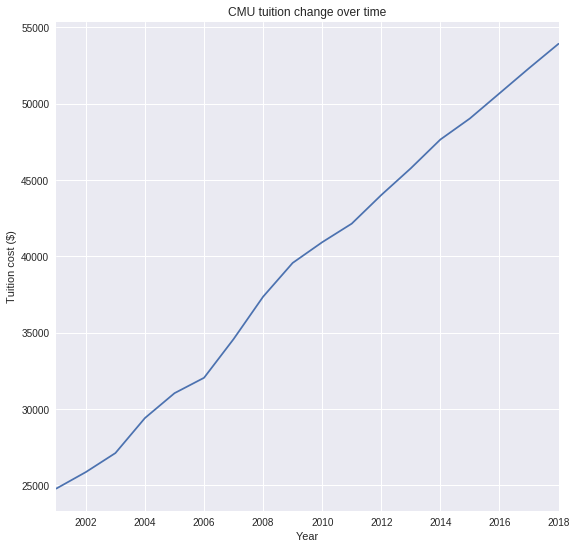

In [90]:
fig = plt.figure(figsize=(9,9))
ax = cmu.plot(y='TUITIONFEE_IN', figsize=(9,9), legend=False)
ax.set(title='CMU tuition change over time', ylabel='Tuition cost ($)')
ax.set_xlim(pd.Timestamp('2001-01-01'))   # start where the data starts
plt.show()

In [91]:
# Looks pretty consistent! What if we compared it with just an average 3% inflation every year.
inflation = np.ones(22) +0.03
inflation[:4] = np.nan
inflation[4] = 25000   # start with $25,000
inflation = np.nancumprod(inflation)
inflation

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.50000000e+04, 2.57500000e+04, 2.65225000e+04, 2.73181750e+04,
       2.81377202e+04, 2.89818519e+04, 2.98513074e+04, 3.07468466e+04,
       3.16692520e+04, 3.26193296e+04, 3.35979095e+04, 3.46058468e+04,
       3.56440222e+04, 3.67133428e+04, 3.78147431e+04, 3.89491854e+04,
       4.01176610e+04, 4.13211908e+04])

In [92]:
cmu['INFLATE'] = inflation
cmu.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,INFLATE
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,211440,Carnegie Mellon University,2.0,NaN,4814.0,NaN,NaN,NaN,NaN,8452.0,NaN,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1998-01-01,211440,Carnegie Mellon University,2.0,NaN,4831.0,NaN,NaN,NaN,NaN,8790.0,NaN,0.7179,NaN,NaN,0.030,NaN,15505.0,16250.0,15029.0,0.987821,0.307051,61004.964744,55590.0,NaN,NaN,NaN,NaN,NaN,NaN,15505.0,NaN,1.0
1999-01-01,211440,Carnegie Mellon University,2.0,NaN,5039.0,NaN,NaN,14268.0,18703.0,9063.0,NaN,0.7520,NaN,NaN,0.027,NaN,15125.0,15125.0,15125.0,0.987763,0.310673,64180.526173,59628.0,NaN,NaN,NaN,NaN,NaN,NaN,15125.0,NaN,1.0
2000-01-01,211440,Carnegie Mellon University,2.0,NaN,5138.0,NaN,NaN,14249.0,18257.0,9366.0,NaN,0.7771,NaN,NaN,0.019,NaN,15062.0,15125.0,14768.0,0.985743,0.314325,68129.050916,61562.0,NaN,NaN,NaN,NaN,NaN,NaN,15062.0,NaN,1.0
2001-01-01,211440,Carnegie Mellon University,2.0,NaN,NaN,24792.0,24792.0,15385.0,19744.0,NaN,NaN,0.7652,NaN,NaN,0.019,NaN,14803.0,15535.0,14500.0,0.980147,0.325000,72036.447059,62038.5,NaN,NaN,NaN,NaN,NaN,NaN,14803.0,NaN,25000.0


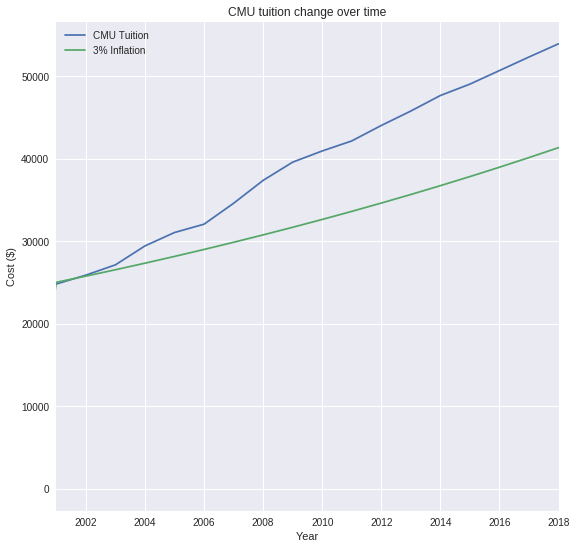

In [93]:
ax = cmu.plot(y=['TUITIONFEE_IN', 'INFLATE'], figsize=(9,9))
ax.set(title='CMU tuition change over time', ylabel='Cost ($)')
ax.set_xlim(pd.Timestamp('2001-01-01'))
ax.legend(['CMU Tuition', '3% Inflation'])
plt.show()

While we're at it, let's see how CMU has changed with relation to some other variables.

In [0]:
cmu2 = cmu.reset_index()
cmu2.count()

Year                  20
UNITID                20
INSTNM                20
ADM_RATE              15
TUITIONFEE_IN         16
TUITIONFEE_OUT        16
C150_4                19
MN_EARN_WNE_P10        6
MD_EARN_WNE_P10        6
PCTPELL                8
RET_FT4               12
UGDS                  19
TUITFTE               18
INEXPFTE              18
AVGFACSAL             19
PCTFLOAN               7
CDR2                  17
CDR3                   5
DEBT_MDN              19
PELL_DEBT_MDN         19
NOPELL_DEBT_MDN       19
PELL_EVER             19
LOAN_EVER             19
FAMINC                19
MD_FAMINC             19
DEBT_MDN_SUPP         19
GRAD_DEBT_MDN_SUPP    14
CONTROL               20
dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


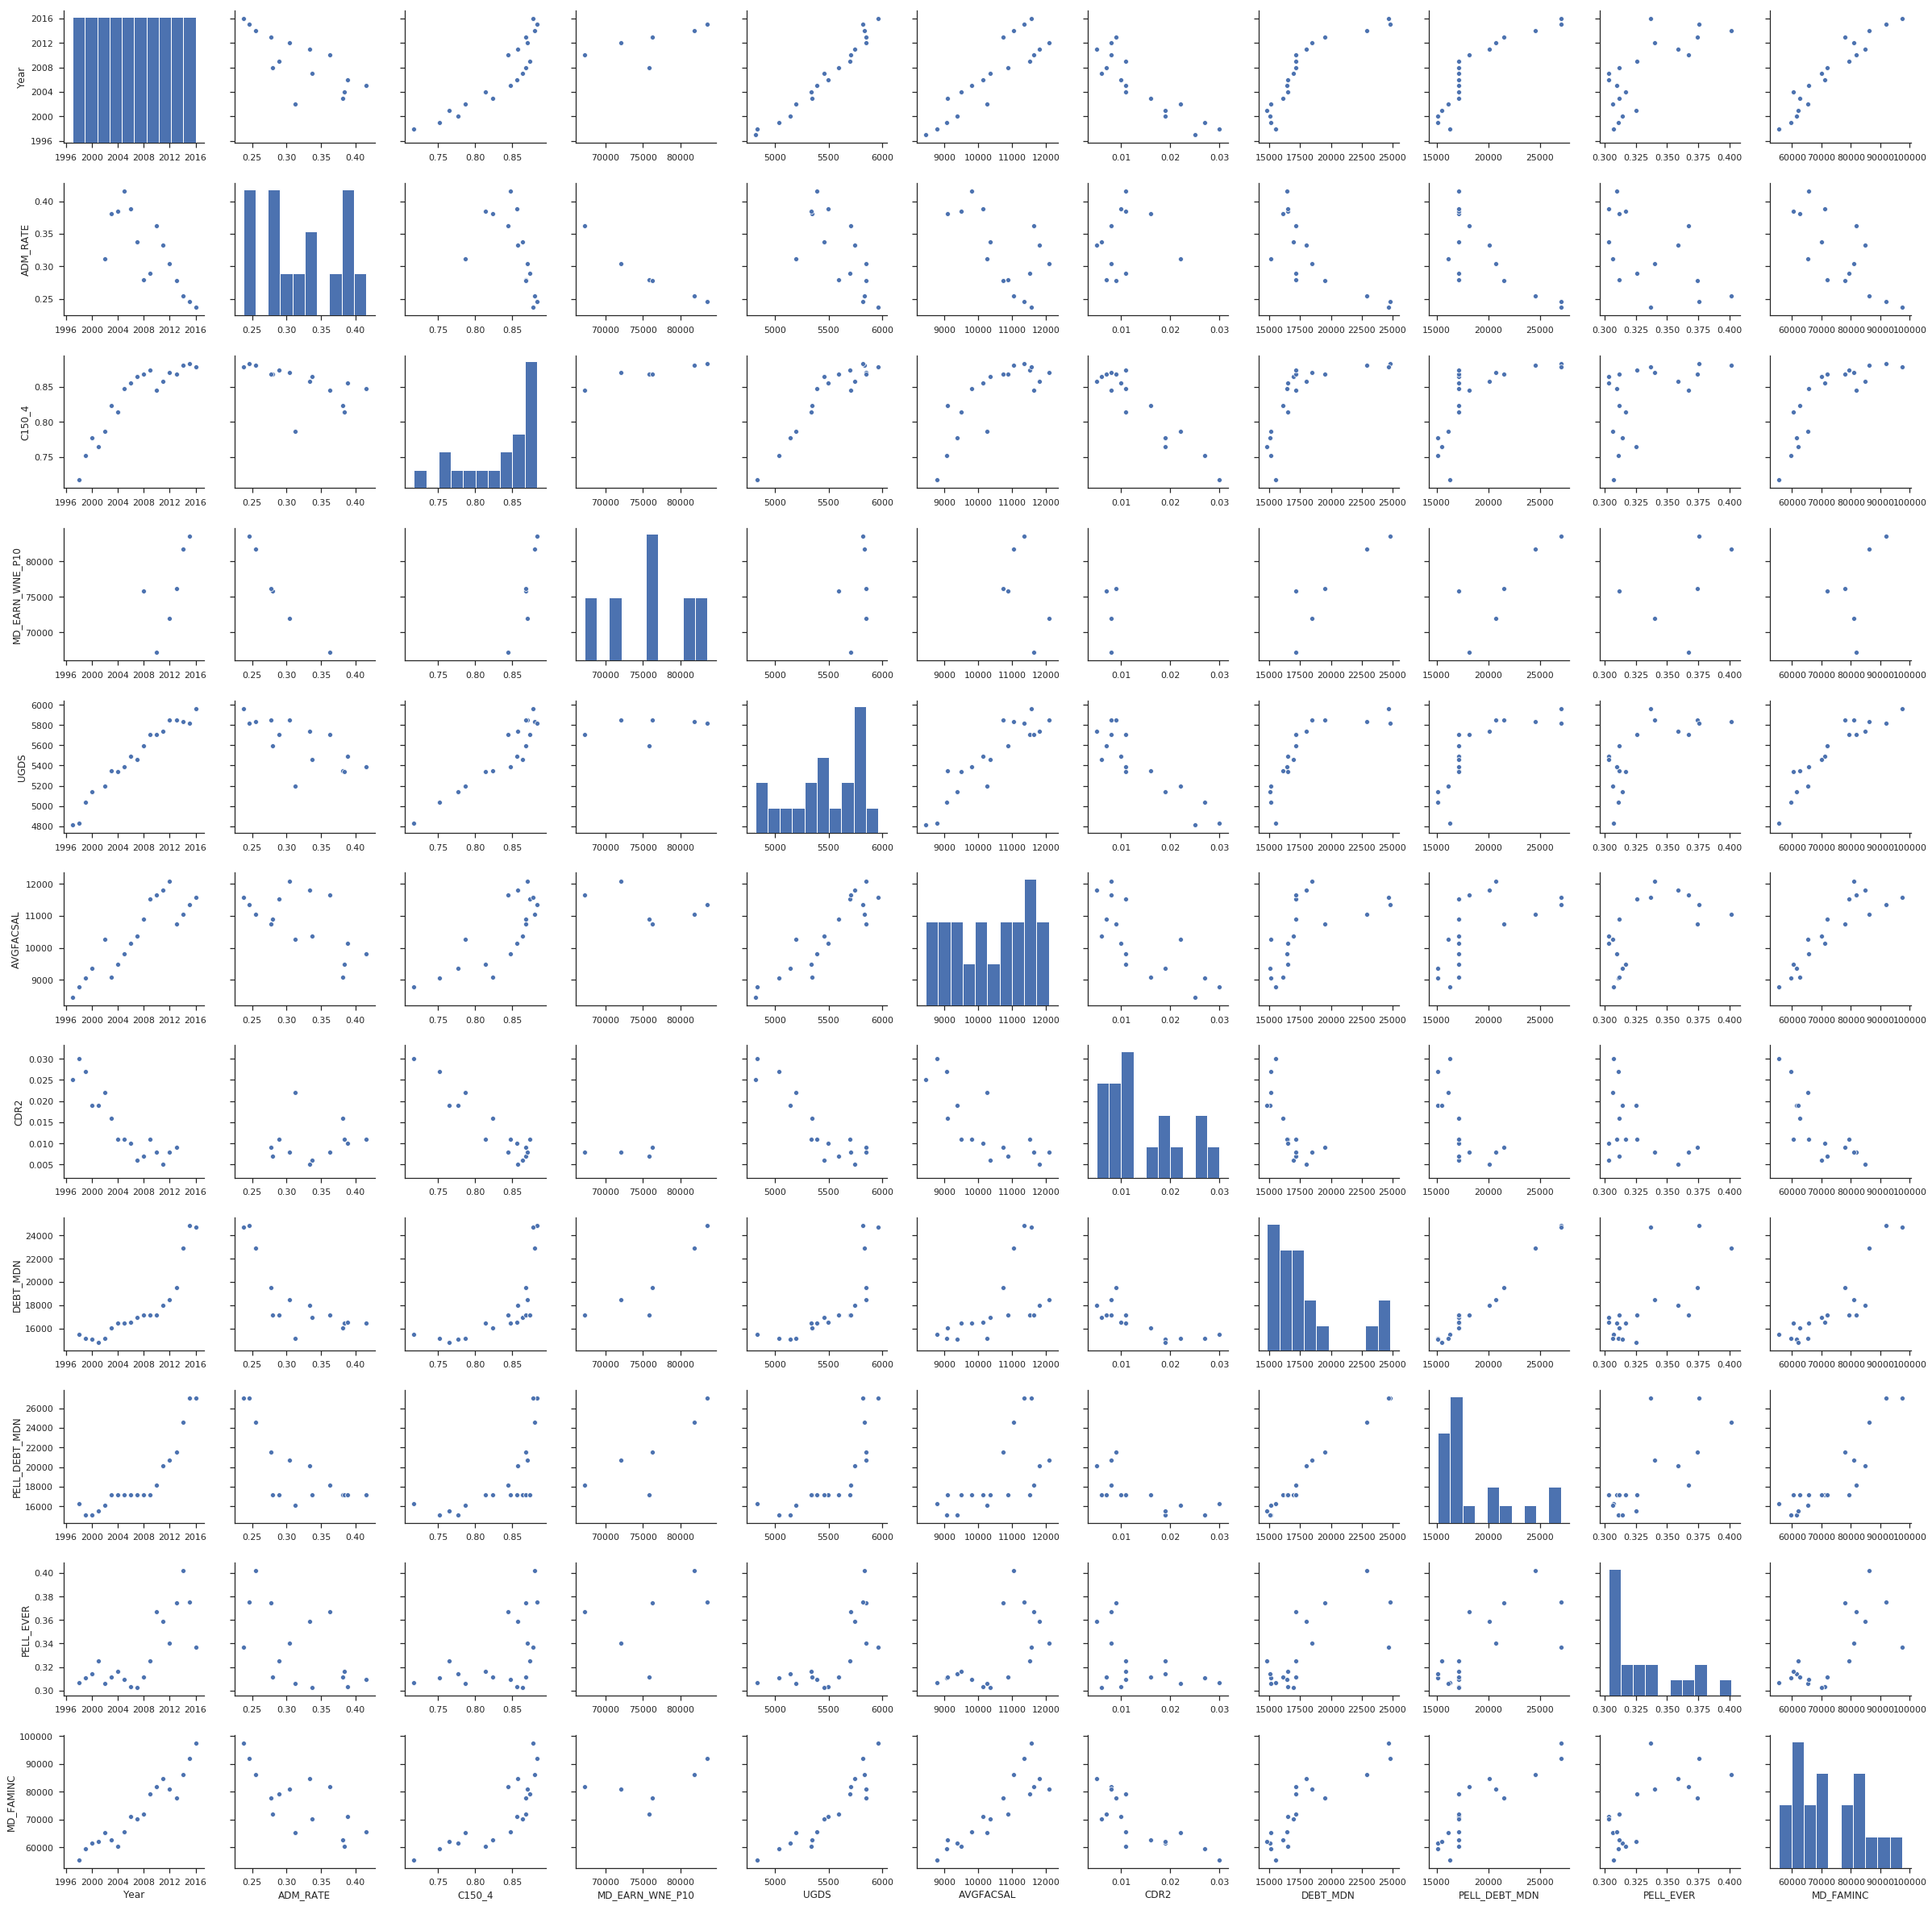

In [0]:
# pairplot lets us quickly look at many trends at once
pp = sns.pairplot(
    cmu2,
    vars=['Year',
          'ADM_RATE',
          'C150_4',
          'MD_EARN_WNE_P10',
          'UGDS',
          'AVGFACSAL',
          'CDR2',
          'DEBT_MDN',
          'PELL_DEBT_MDN',
          'PELL_EVER',
          'MD_FAMINC'],
    height=3)

for ax in pp.axes.flat:
  ax.tick_params(axis='x', labelbottom=True)

plt.subplots_adjust(hspace=0.3)

Well, even as tuition has gone up, it looks like so too have completion rates, debt, faculty salary, and earnings. At the same time default rates and admission rates have steadily decreased.

Let's zoom in on a few of these.

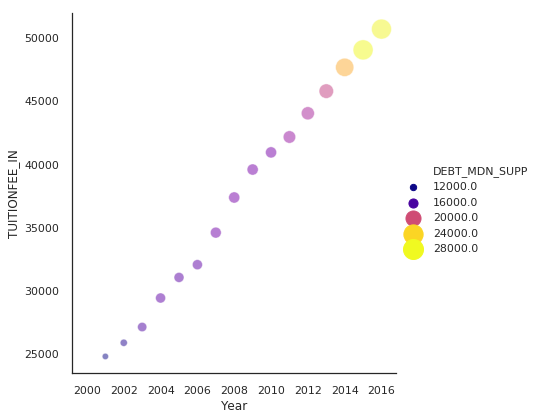

In [0]:
sns.set(style="white")
ax = sns.relplot(x='Year', y='TUITIONFEE_IN', hue='DEBT_MDN_SUPP', size='DEBT_MDN_SUPP', sizes=(40,400), data=cmu2, alpha=0.5, palette='plasma', height=6)

## CMU vs. other schools
Clearly tuition has gone up faster than plain old inflation.
How does this compare to other schools?

In [57]:
big_schools.count()

UNITID                16433
INSTNM                16433
CONTROL               16433
ADM_RATE               7503
UGDS                  16433
TUITIONFEE_IN         13890
TUITIONFEE_OUT        13890
TUITFTE               15195
INEXPFTE              15195
AVGFACSAL             16344
PCTPELL                8891
C150_4                 9318
RET_FT4                6833
PCTFLOAN               8057
CDR2                  12057
CDR3                   6126
DEBT_MDN              14710
PELL_DEBT_MDN         14535
NOPELL_DEBT_MDN       14535
LOAN_EVER             14701
PELL_EVER             14593
FAMINC                14943
MD_FAMINC             14943
MN_EARN_WNE_P6         6742
MD_EARN_WNE_P6         6742
PCT10_EARN_WNE_P6      4066
PCT25_EARN_WNE_P6      6741
PCT75_EARN_WNE_P6      6741
PCT90_EARN_WNE_P6      4066
DEBT_MDN_SUPP         14689
GRAD_DEBT_MDN_SUPP    12789
Year                  16433
dtype: int64

### Tuition


In [0]:
# for reproducibility
np.random.seed(95885)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['TUITIONFEE_IN'] > 15

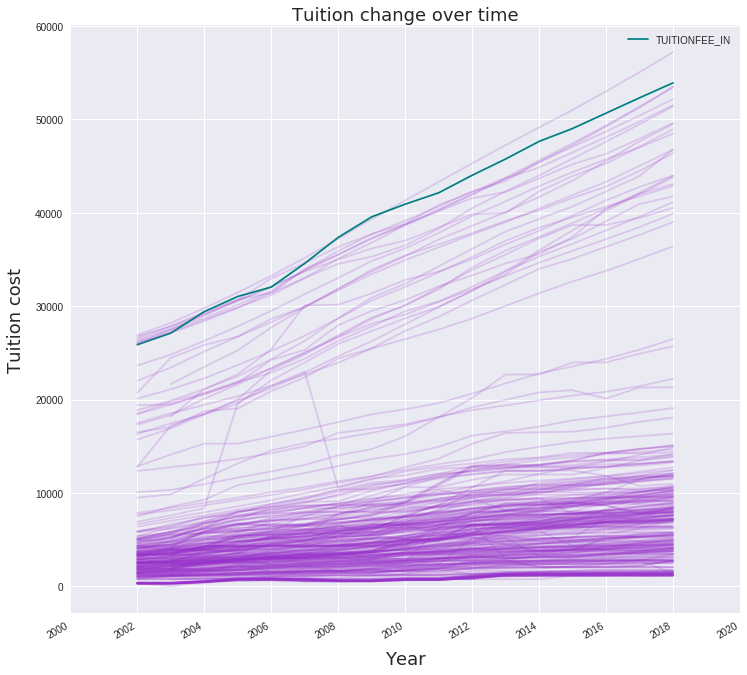

In [66]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='TUITIONFEE_IN', c='teal', ax=ax, legend=['CMU Tuition'], figsize=(12,12))
  elif data_filter[key]:
    gp.plot(x='Year', y='TUITIONFEE_IN', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Tuition change over time', fontdict=font, pad=5)
ax.set_ylabel('Tuition cost', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

In [71]:
# let's look at pricier, more selective schools with the data we want
gr = big_schools.groupby(by='UNITID')
data_filter = gr.count()[['TUITIONFEE_IN', 'C150_4', 'ADM_RATE', 'DEBT_MDN_SUPP']] > 13
data_filter.loc[211440, 'TUITIONFEE_IN']

True

In [0]:
# one year snapshot
big_pricey_schools = pd.concat([df for key, df in gr if any(data_filter.loc[key])])
big_pricey_schools.head()

,Year,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCTPELL,RET_FT4,UGDS,TUITFTE,INEXPFTE,AVGFACSAL,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,PELL_EVER,LOAN_EVER,FAMINC,MD_FAMINC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,CONTROL
2,1997-01-01,100663,University of Alabama at Birmingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9889.0,NaN,NaN,5988.0,NaN,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6796,1998-01-01,100663,University of Alabama at Birmingham,NaN,NaN,NaN,0.3319,NaN,NaN,NaN,NaN,10181.0,NaN,NaN,6101.0,NaN,0.095,NaN,4000.0,3540.5,4417.0,0.629204,0.872397,27638.243994,19173.5,4000.0,10500.0,1.0
13494,1999-01-01,100663,University of Alabama at Birmingham,NaN,NaN,NaN,0.3274,NaN,NaN,NaN,NaN,9562.0,4030.0,10418.0,6398.0,NaN,0.077,NaN,4125.0,3666.0,4605.0,0.622610,0.872541,29388.041563,20243.0,4125.0,10500.0,1.0
19974,2000-01-01,100663,University of Alabama at Birmingham,NaN,NaN,NaN,0.3529,NaN,NaN,NaN,NaN,9532.0,4228.0,10469.0,6559.0,NaN,0.054,NaN,4952.0,4281.0,5172.0,0.625756,0.891962,30944.073754,21394.0,4952.0,11300.0,1.0
32918,2002-01-01,100663,University of Alabama at Birmingham,0.9098,3640.0,6610.0,0.3764,NaN,NaN,NaN,NaN,9183.0,4982.0,12271.0,6596.0,NaN,0.049,NaN,5000.0,5000.0,5000.0,0.616974,0.903683,34688.200100,24240.5,5000.0,4142.0,1.0


Interesting. Looks like some schools have stayed extremely consistent while CMU and some others have increased steadily. Now ultimately we want to look at how this compares to earnings outcomes, balanced against completion rates and admissions. Let's walk through the story of 


* Admissions
* Tuition 
* Completion
* Earnings
* Debt



### Admissions

In [0]:
# for reproducibility
np.random.seed(1)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['ADM_RATE'] >= 13

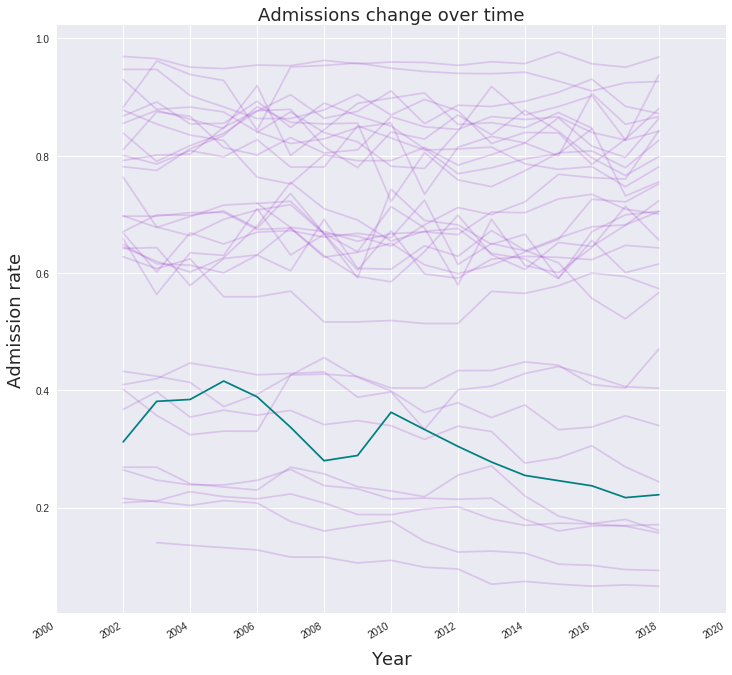

In [61]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='ADM_RATE', c='teal', ax=ax, legend=False, figsize=(12,12))
  elif data_filter[key] and gp.ADM_RATE.std() < 0.05:   # ensure enough data
    gp.plot(x='Year', y='ADM_RATE', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Admissions change over time', fontdict=font, pad=5)
ax.set_ylabel('Admission rate', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

### Completion

In [0]:
# for reproducibility
np.random.seed(2)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['C150_4'] >= 17

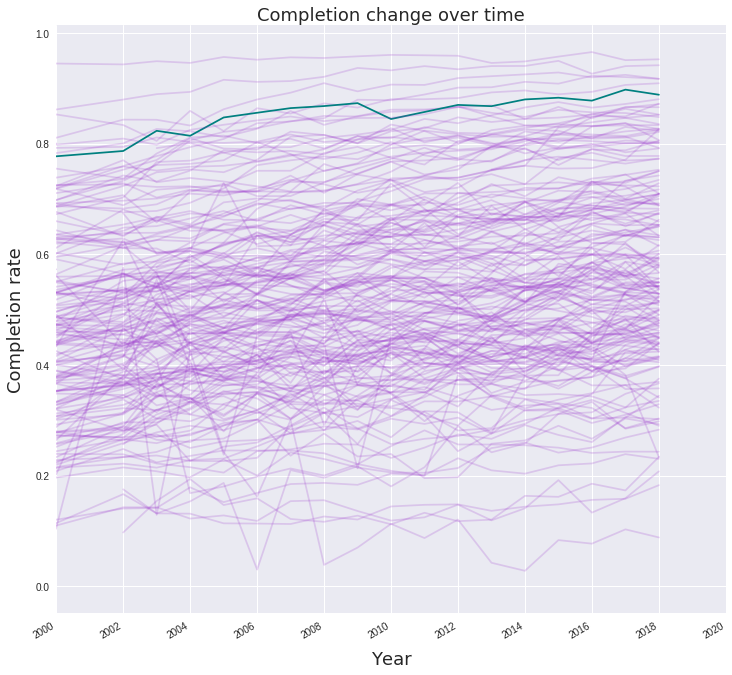

In [0]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='C150_4', c='teal', ax=ax, legend=False, figsize=(12,12))
  elif data_filter[key]:   # ensure enough data
    gp.plot(x='Year', y='C150_4', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Completion change over time', fontdict=font, pad=5)
ax.set_ylabel('Completion rate', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

### Earnings


In [0]:
# for reproducibility
np.random.seed(3)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:2000]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['MN_EARN_WNE_P6'] >= 6

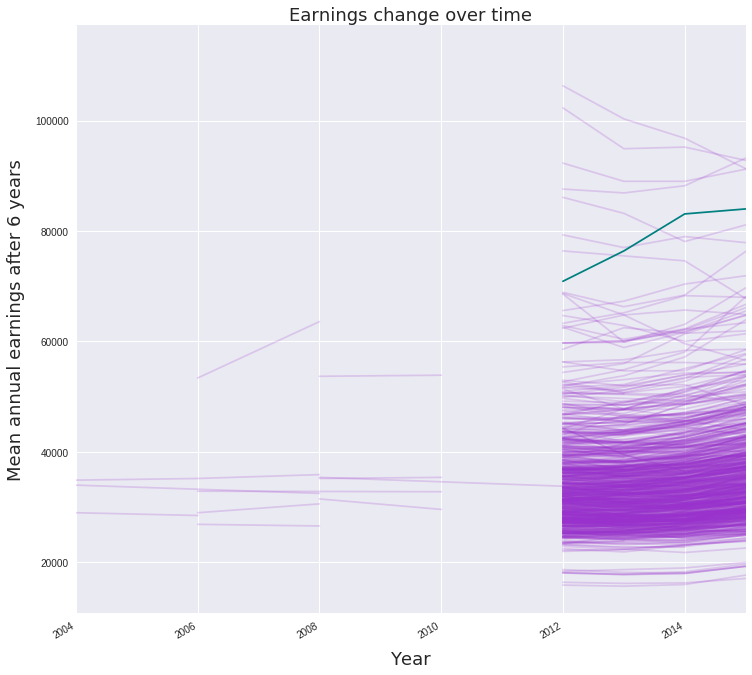

In [70]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='MN_EARN_WNE_P6', c='teal', ax=ax, legend=False, figsize=(12,12))
  elif data_filter[key]:   # ensure enough data
    gp.plot(x='Year', y='MN_EARN_WNE_P6', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2015-01-01'))
ax.set_title('Earnings change over time', fontdict=font, pad=5)
ax.set_ylabel('Mean annual earnings after 6 years', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

### Debt

In [0]:
# for reproducibility
np.random.seed(4)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['DEBT_MDN_SUPP'] >= 18

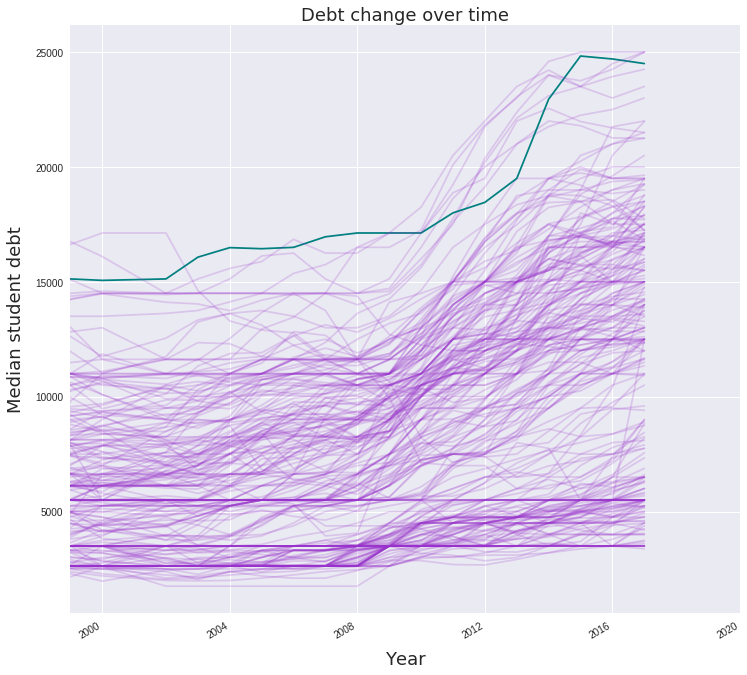

In [0]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='DEBT_MDN_SUPP', c='teal', ax=ax, legend=False, figsize=(12,12))
  elif data_filter[key]:   # ensure enough data
    gp.plot(x='Year', y='DEBT_MDN_SUPP', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Debt change over time', fontdict=font, pad=5)
ax.set_ylabel('Median student debt', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

# Most recent data
Let's look at this last year's data again and see if anything interesting crops up.

In [72]:
data = pd.read_csv('data/Most-Recent-Cohorts-All-Data-Elements.csv', na_values='PrivacySuppressed')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,OMENRYP_ALL,OMENRAP_ALL,OMAWDP8_ALL,OMENRUP_ALL,OMENRYP_FIRSTTIME,OMENRAP_FIRSTTIME,OMAWDP8_FIRSTTIME,OMENRUP_FIRSTTIME,OMENRYP_NOTFIRSTTIME,OMENRAP_NOTFIRSTTIME,OMAWDP8_NOTFIRSTTIME,OMENRUP_NOTFIRSTTIME,OMENRYP_FULLTIME,OMENRAP_FULLTIME,OMAWDP8_FULLTIME,OMENRUP_FULLTIME,OMENRYP_PARTTIME,OMENRAP_PARTTIME,OMAWDP8_PARTTIME,OMENRUP_PARTTIME,OMENRYP_ALL_POOLED_SUPP,OMENRAP_ALL_POOLED_SUPP,OMAWDP8_ALL_POOLED_SUPP,OMENRUP_ALL_POOLED_SUPP,OMENRYP_FIRSTTIME_POOLED_SUPP,OMENRAP_FIRSTTIME_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMENRUP_FIRSTTIME_POOLED_SUPP,OMENRYP_NOTFIRSTTIME_POOLED_SUPP,OMENRAP_NOTFIRSTTIME_POOLED_SUPP,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.9027,0.902671,365.0,485.0,...,0.0260,0.4052,0.3537,0.2150,0.0311,0.4235,0.3336,0.2118,0.0142,0.3623,0.4008,0.2227,0.0251,0.3966,0.3707,0.2076,0.0309,0.4517,0.2625,0.2548,0.0152,0.3255,0.3645,0.2947,0.0163,0.3273,0.3532,0.3032,0.0113,0.3194,0.4048,0.2645,0.0137,0.3150,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,3.0,0,1,1,3,4,1,1,5,12.0,NaN,33.505697,-86.799345,15.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.9181,0.918068,440.0,630.0,...,0.1281,0.2664,0.5441,0.0615,0.1270,0.2724,0.5594,0.0413,0.1292,0.2603,0.5284,0.0822,0.1162,0.2663,0.5721,0.0454,0.1886,0.2672,0.4008,0.1434,0.0828,0.2588,0.5591,0.0993,0.0786,0.2684,0.5716,0.0814,0.0876,0.2477,0.5448,0.1200,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,3.0,0,1,1,3,4,2,1,5,12.0,NaN,32.362609,-86.174010,20.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,0.0165,0.2686,0.4174,0.2975,0.0000,0.2778,0.3333,0.3889,0.0179,0.2679,0.4241,0.2902,0.0112,0.2793,0.4022,0.3073,0.0317,0.2381,0.4603,0.2698,0.0185,0.3386,0.4418,0.2011,0.0263,0.4474,0.2368,0.2895,0.0176,0.3265,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.0280,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.724557,-86.640449,16.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.8123,0.812304,550.0,660.0,...,0.0166,0.3153,0.5140,0.1541,0.0243,0.3360,0.5110,0.1286,0.0100,0.2973,0.5165,0.1762,0.0163,0.3042,0.5472,0.1322,0.0183,0.3670,0.3578,0.2569,0.0177,0.3337,0.5079,0.1406,0.0223,0.3514,0.5039,0.1224,0.0130,0.3156,0.5121,0.1593,0.0165,0.3230,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,3.0,0,1,1,3,4,1,1,5,12.0,NaN,32.364317,-86.295677,19.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.9787,0.978661,380.0,485.0,...,0.0355,0.5073,0.3177,0.1395,0.0342,0.5023,0.2924,0.1711,0.0412,0.5292,0.4296,0.0000,0.0362,0.5049,0.3226,0.1363,0.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1944), int64(14), object(19)
memory usage: 107.3+ MB


In [74]:
# let's get tuition, mean/median earnings after 10 years, admittance rates, percentage of Pell grants,retention rate at 4-year colleges
sub_data = data[['UNITID',
                 'TUITIONFEE_IN', 
                 'TUITIONFEE_OUT', 
                 'MN_EARN_WNE_P6', 
                 'MD_EARN_WNE_P6', 
                 'MN_EARN_WNE_P10', 
                 'MD_EARN_WNE_P10',
                 'ADM_RATE',
                 'PCTPELL',
                 'DEBT_MDN',
                 'GRAD_DEBT_MDN',
                'RET_FT4','C150_4']].copy()
sub_data.head()

,UNITID,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P6,MD_EARN_WNE_P6,MN_EARN_WNE_P10,MD_EARN_WNE_P10,ADM_RATE,PCTPELL,DEBT_MDN,GRAD_DEBT_MDN,RET_FT4,C150_4
0,100654,9857.0,18236.0,28400.0,25200.0,35500.0,31000.0,0.9027,0.7100,13246.0,32750.0,0.5879,0.2396
1,100663,8328.0,19032.0,39400.0,35100.0,48400.0,41200.0,0.9181,0.3532,14979.5,21833.0,0.8436,0.5292
2,100690,6900.0,6900.0,35400.0,30700.0,47600.0,39600.0,NaN,0.7415,10430.0,22890.0,0.6667,0.1818
3,100706,10280.0,21480.0,40300.0,36200.0,52000.0,46700.0,0.8123,0.2765,13522.0,22647.0,0.8248,0.4862
4,100724,11068.0,19396.0,24400.0,22600.0,30600.0,27700.0,0.9787,0.7377,15738.0,31500.0,0.5923,0.2769


In [75]:
sub_data['MN_EARN_WNE_P6'] = pd.to_numeric(sub_data['MN_EARN_WNE_P6'])
sub_data['MD_EARN_WNE_P6'] = pd.to_numeric(sub_data['MD_EARN_WNE_P6'])
sub_data['MN_EARN_WNE_P10'] = pd.to_numeric(sub_data['MN_EARN_WNE_P10'])
sub_data['MD_EARN_WNE_P10'] = pd.to_numeric(sub_data['MD_EARN_WNE_P10'])
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 13 columns):
UNITID             7112 non-null int64
TUITIONFEE_IN      4021 non-null float64
TUITIONFEE_OUT     3793 non-null float64
MN_EARN_WNE_P6     5358 non-null float64
MD_EARN_WNE_P6     5358 non-null float64
MN_EARN_WNE_P10    5175 non-null float64
MD_EARN_WNE_P10    5175 non-null float64
ADM_RATE           2037 non-null float64
PCTPELL            6342 non-null float64
DEBT_MDN           5969 non-null float64
GRAD_DEBT_MDN      5570 non-null float64
RET_FT4            2174 non-null float64
C150_4             2383 non-null float64
dtypes: float64(12), int64(1)
memory usage: 722.4 KB


Text(0.5, 0, 'Tuition cost')

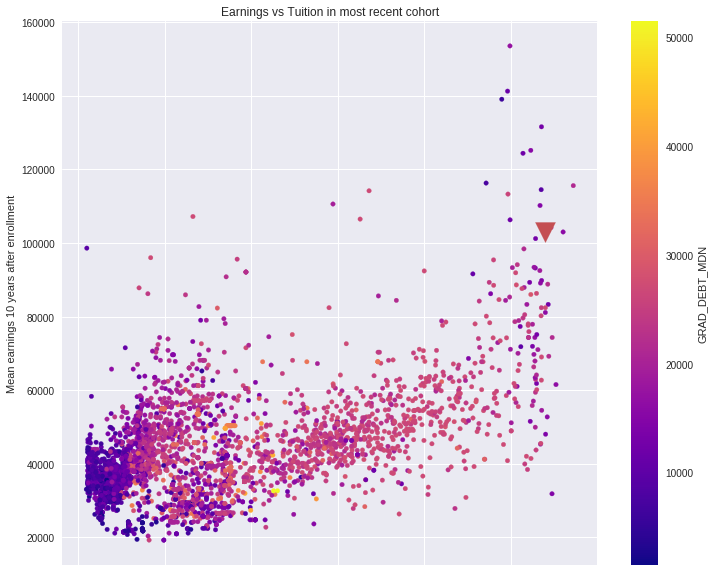

In [82]:
ax = sub_data.plot.scatter(x='TUITIONFEE_IN', y='MN_EARN_WNE_P10', c='GRAD_DEBT_MDN', cmap='plasma', figsize=(12,10));
ax.scatter(sub_data[cmu_mask].TUITIONFEE_IN, sub_data[cmu_mask].MN_EARN_WNE_P10, s=400, c='r', marker='v')
ax.set_title('Earnings vs Tuition in most recent cohort')
ax.set_ylabel('Mean earnings 10 years after enrollment')
ax.set_xlabel('Tuition cost')